In [7]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../../../'))

import theano.tensor as T
from theano import config, shared
import numpy as np

from deepensemble.utils.utils_functions import ActivationFunctions
from deepensemble.models.sequential import Sequential
from deepensemble.layers.dense import Dense
from deepensemble.metrics import *
from deepensemble.utils import *

from collections import OrderedDict


In [8]:
N = 200
y1 = np.random.binomial(1, 0.8, (N, 1))
y1 = y1.astype(dtype=config.floatX)

s = ITLFunctions.silverman(y1)  # Silverman
print('Silverman: %0.4g' % s.eval())

AV_C = []
AV_J = []
AV_M = []

AUC = np.linspace(0, 1, 51)
for auc in AUC:
    sys.stdout.write("\r%.0f%%" % (100 * auc))
    sys.stdout.flush()
    y2 = y1.copy()
    m = int(auc * N)
    y2[:m] = 1 - y2[:m]

    V_nc, V_J, V_M = ITLFunctions.get_cip([y2], y1, s)
    
    AV_C.append(V_nc.eval())
    AV_J.append(V_J.eval())
    AV_M.append(V_M.eval())

AV_C = np.array(AV_C)
AV_J = np.array(AV_J)
AV_M = np.array(AV_M)

Silverman: 0.159
100%

<IPython.core.display.Javascript object>


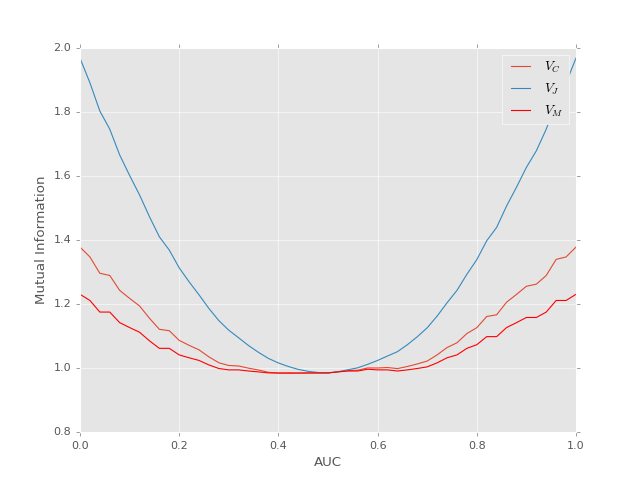

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

f = plt.figure()

plt.plot(AUC, AV_C, label='$V_C$')
plt.plot(AUC, AV_J, label='$V_J$')
plt.plot(AUC, AV_M, 'r', label='$V_M$')
plt.xlabel('AUC')
plt.ylabel('Mutual Information')
plt.legend()

plt.show()


<IPython.core.display.Javascript object>


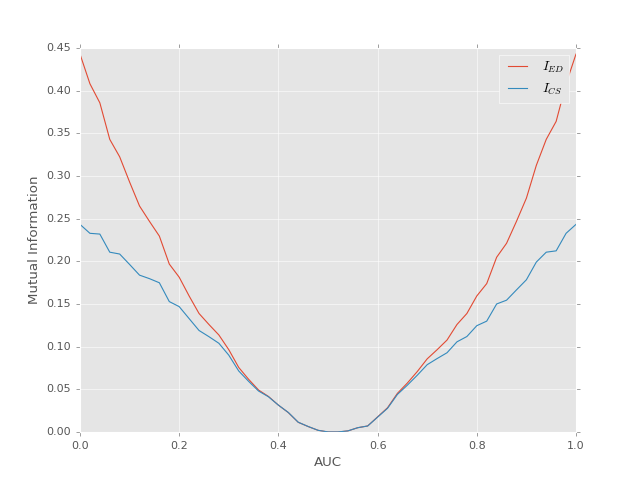

In [11]:
f = plt.figure()

plt.plot(AUC, AV_J - 2 * AV_C + AV_M, label='$I_{ED}$')
plt.plot(AUC, np.log(AV_J) - 2 * np.log(AV_C) + np.log(AV_M), label='$I_{CS}$')
plt.xlabel('AUC')
plt.ylabel('Mutual Information')
plt.legend()

plt.show()